In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('iris.data.csv')
df.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']

In [3]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
label_encoder = preprocessing.LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])  

In [5]:
Xij = df.iloc[:, :-1].values
yij = df.iloc[:, -1].values
yij1 = df.iloc[:, 7:].values
d = pd.DataFrame(preprocessing.StandardScaler().fit_transform(Xij)) 
Xij = pd.DataFrame(d)
Xij.head()

,0,1,2,3
0,-1.148356,-0.118060,-1.353964,-1.325063
1,-1.390542,0.344859,-1.410986,-1.325063
2,-1.511636,0.113399,-1.296943,-1.325063
3,-1.027262,1.270695,-1.353964,-1.325063
4,-0.542889,1.965072,-1.182901,-1.061466


In [6]:
X_train, X_test, y_train, y_test = train_test_split(Xij, yij, test_size = 0.1, random_state = 0)

In [7]:
def mean_squared_error(p, l):
    N = l.size
    mse = ((p - l)**2).sum() / (2*N)
    
    return mse

def accuracy(p, l):
    predicions = p.argmax(axis=1) == l.argmax(axis=1)
    accuracy = predicions.mean()
    
    return accuracy

def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def forward(X, w):
    inputs = np.dot(X, w)
    outputs = sigmoid(inputs)
    
    return outputs
acc = 97.36842105263158
def backprop(output_layer_outputs, hidden_layer_outputs, y_train, weights_1, weights_2):
    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)
    
    return output_layer_error, output_layer_delta, hidden_layer_error, hidden_layer_delta

def update_weights(w, o, delta):
    updated_weights = np.dot(o.T, delta) / N
    new_weights = w - lr * updated_weights
    
    return new_weights

In [8]:
lr = 0.1
epochs = 15000

n_input = 4
n_hidden = 2
n_output = 3


N = y_train.size

np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden)) 
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))

monitor = {"mean_squared_error": [], "accuracy": []}

In [9]:
y_train = np.reshape(y_train,(134,1))

In [10]:
y_test = np.reshape(y_test,(15,1))

In [11]:
for epoch in range(epochs):    
    
    # forward
    hidden_layer_outputs = forward(X_train, weights_1)
    output_layer_outputs = forward(hidden_layer_outputs, weights_2)
    
    
    # monitor training process
    
    ms = mean_squared_error(output_layer_outputs, y_train)
    a = accuracy(output_layer_outputs, y_train)
    
    monitor["mean_squared_error"].append(ms)
    monitor["accuracy"].append(a)
    
    
    # backprop
    output_layer_error, output_layer_delta, hidden_layer_error, hidden_layer_delta = backprop(output_layer_outputs, hidden_layer_outputs, y_train, weights_1, weights_2)

    
    # update weights
    weights_2 = update_weights(weights_2, hidden_layer_outputs, output_layer_delta)
    weights_1 = update_weights(weights_1, X_train, hidden_layer_delta)

In [12]:
hidden_layer_inputs = np.dot(X_test, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

In [13]:
accu = accuracy(output_layer_outputs, y_test) * 100
print("Accuracy: {}".format(accu))

Accuracy: 73.33333333333333


c:\users\ishan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\ishan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\ishan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword 

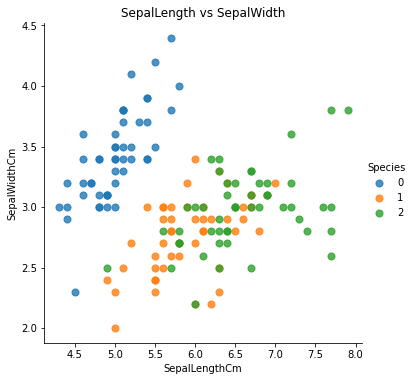

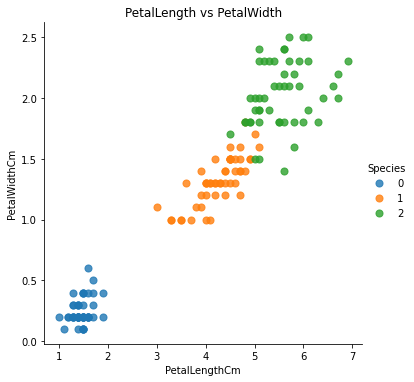

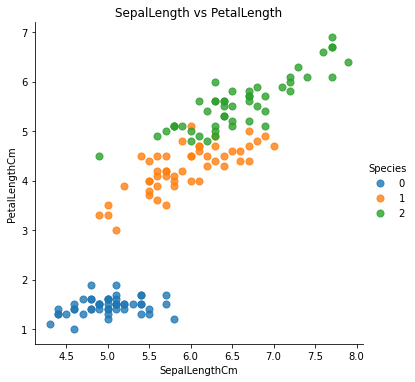

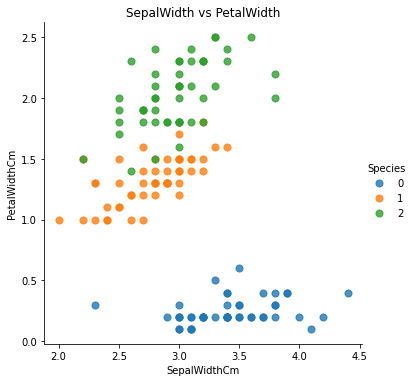

In [14]:
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
sns.lmplot('SepalLengthCm', 'SepalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('PetalLengthCm', 'PetalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('SepalLengthCm', 'PetalLengthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('SepalWidthCm', 'PetalWidthCm',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

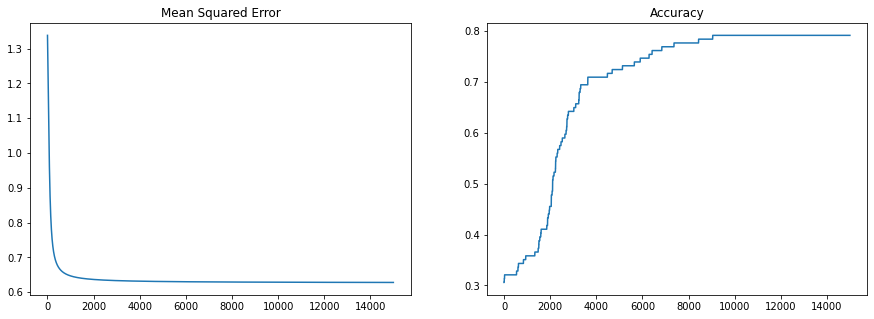

In [15]:
monitoring = pd.DataFrame(monitor)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
monitoring.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring.accuracy.plot(ax=axes[1], title="Accuracy");